In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 간단한 합성곱 신경망

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
# MNIST 이미지 데이터셋에 대한 합성곱 신경망 훈련
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 13s 4ms/step - loss: 0.1571 - accuracy: 0.9524
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0432 - accuracy: 0.9866
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0300 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0230 - accuracy: 0.9930
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0178 - accuracy: 0.9942


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc:.3f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0272 - accuracy: 0.9914
Test Accuracy: 0.991


## 8.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

In [ ]:
# 강아지 고양이 데이터셋

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"seoulite","key":"ecd29f63a70c496e9e6454df78e2a609"}'}

In [ ]:
!mkdir ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 792M/812M [00:03<00:00, 265MB/s]
100% 812M/812M [00:03<00:00, 261MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip && unzip -qq train.zip

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir =  pathlib.Path('cats_vs_dogs_small')


In [ ]:
def make_subset(subset_name, start_index, end_index):
  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f'{category}.{i}.jpg'
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)

In [ ]:
# 모델을 만들자

from tensorflow import keras
from tensorflow.keras import layers

inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# 이미지 읽기

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# 데이터셋 객체로 데이터 및 레이블 확인
for data_batch, label_batch in train_dataset:
  print('데이터 배치 크기:', data_batch.shape)
  print('레이블 배치 크기:', label_batch.shape)
  break # 배치 1개만 확인

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [ ]:
# Dataset 객체로 모델 훈련

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.k',
        save_best_only=True,
        monitor='val_loss')
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
24/63 [==========>...................] - ETA: 2s - loss: 0.7496 - accuracy: 0.4922

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
test_model = keras.models.load_model('convnet_from_scratch.txt')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test Accuracy: {test_acc:.3f}')

63/63 [==============================] - 2s 32ms/step - loss: 0.5587 - accuracy: 0.7050
Test Accuracy: 0.705


In [ ]:
# 정확도 향상을 위한 데이터 증강 층 구성
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

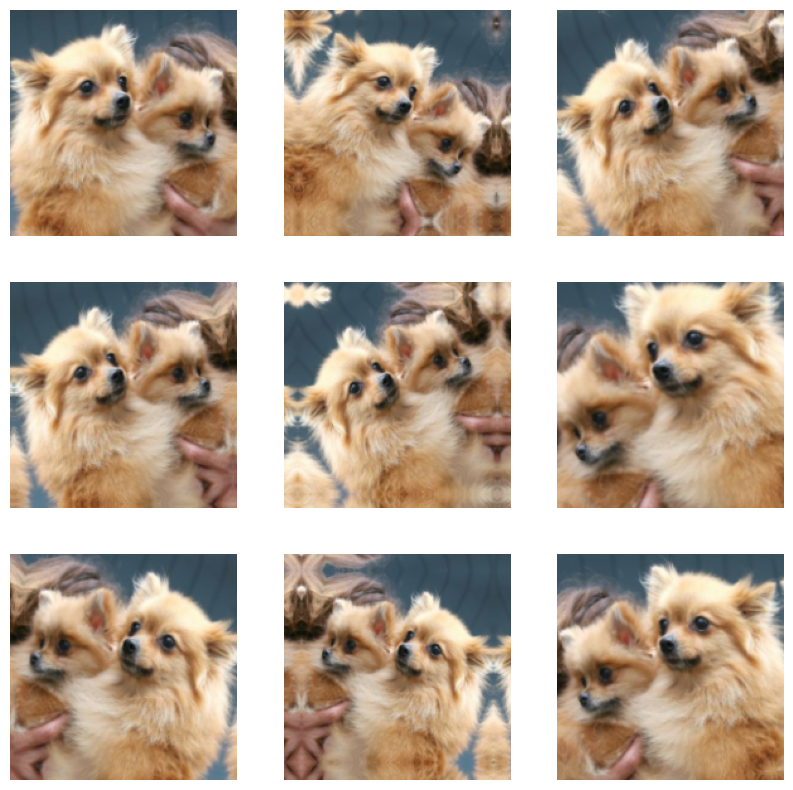

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
# 이미지 증식 및 드롭아웃 포함한 컨브넷 재구성
inputs = layers.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# 규제 추가하여 컨브넷 훈련
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch_with_augmentation.k',
        save_best_only='True',
        monitor='val_loss',
        save_format='tf')
]
history = model.fit(
    train_dataset, epochs=100, validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 39s 592ms/step - loss: 0.6967 - accuracy: 0.4930 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 6s 99ms/step - loss: 0.6962 - accuracy: 0.5065 - val_loss: 0.6907 - val_accuracy: 0.5520
Epoch 3/100
63/63 [==============================] - 6s 85ms/step - loss: 0.6888 - accuracy: 0.5550 - val_loss: 0.6779 - val_accuracy: 0.5190
Epoch 4/100
63/63 [==============================] - 5s 69ms/step - loss: 0.6696 - accuracy: 0.6275 - val_loss: 0.9930 - val_accuracy: 0.5120
Epoch 5/100
63/63 [==============================] - 4s 61ms/step - loss: 0.6381 - accuracy: 0.6355 - val_loss: 0.8067 - val_accuracy: 0.5340
Epoch 6/100
63/63 [==============================] - 7s 107ms/step - loss: 0.6328 - accuracy: 0.6555 - val_loss: 0.6286 - val_accuracy: 0.6290
Epoch 7/100
63/63 [==============================] - 6s 86ms/step - loss: 0.6033 - accuracy: 0.6770 - val_loss: 0.6098 - val_accuracy: 0.6690
Epo

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 8.3 사전 훈련된 모델 활용하기

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False, # 기본값은 1000개 분류, 여기서는 강아지/고양이 이진분류이므로 제외
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
# 데이터셋 다운로드 및 접근을 위한 셋팅

from google.colab import files
files.upload()

!mkdir ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

!cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
!unzip -qq dogs-vs-cats.zip && unzip -qq train.zip

Saving kaggle.json to kaggle.json
100% 810M/812M [00:21<00:00, 42.8MB/s]
100% 812M/812M [00:21<00:00, 40.4MB/s]


In [ ]:
# 데이터셋 불러오기 (8.1에서 가져옴)

from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir =  pathlib.Path('cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
  for category in ('cat', 'dog'):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f'{category}.{i}.jpg'
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset('train', start_index=0, end_index=1000)
make_subset('validation', start_index=1000, end_index=1500)
make_subset('test', start_index=1500, end_index=2500)


In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
# 데이터 증강 없는 빠른 특성 추출 모델 (저렴이 버전)
import numpy as np
from tensorflow import keras

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 75ms/step


In [ ]:
from tensorflow.keras import layers
# 밀집 연결 분류기 정의 및 훈련
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

callbacks =[
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction',
        save_best_only=True,
        monitor='val_loss')
]
history = model.fit(train_features, train_labels, epochs=20, validation_data=(val_features, val_labels),
                    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 21ms/step - loss: 10.9627 - accuracy: 0.9260 - val_loss: 4.0727 - val_accuracy: 0.9670
Epoch 2/20
63/63 [==============================] - 1s 14ms/step - loss: 2.9891 - accuracy: 0.9745 - val_loss: 3.5981 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 2.0822 - accuracy: 0.9830 - val_loss: 5.7044 - val_accuracy: 0.9720
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 0.7989 - accuracy: 0.9915 - val_loss: 3.3252 - val_accuracy: 0.9810
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.7401 - accuracy: 0.9940 - val_loss: 4.5021 - val_accuracy: 0.9770
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.9217 - accuracy: 0.9940 - val_loss: 5.0972 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8246 - accuracy: 0.9950 - val_loss: 3.6749 - val_accuracy: 0.9810
Epoch 8/20
63/63

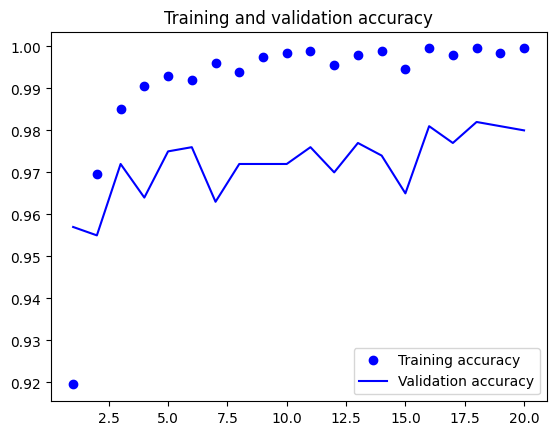

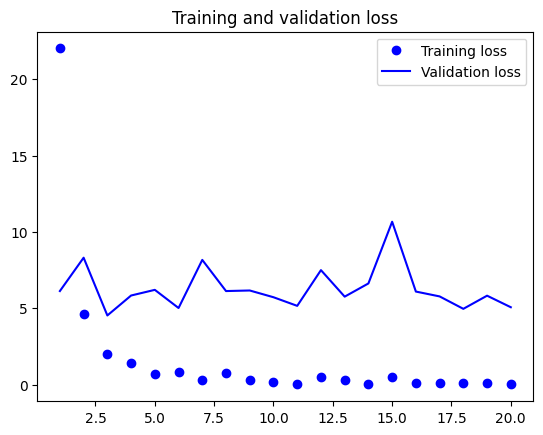

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 데이터 증강 적용 후 특성 추출 (비싸다)
conv_base.trainable = False # 합성곱 기반층 동결 (가중치 업데이트 방지)

# 데이터 증강(이전 절에서 가져옴) 및 밀집분류기 연결
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='feature_extraction_with_data_augmentation',
        save_best_only=1,
        monitor='val_loss')
]
history=model.fit(train_dataset, epochs=50,
                  validation_data=validation_dataset,
                  callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 18s 252ms/step - loss: 17.7061 - accuracy: 0.9000 - val_loss: 8.6331 - val_accuracy: 0.9510
Epoch 2/50
63/63 [==============================] - 16s 257ms/step - loss: 8.1102 - accuracy: 0.9370 - val_loss: 4.5071 - val_accuracy: 0.9760
Epoch 3/50
63/63 [==============================] - 10s 147ms/step - loss: 5.0453 - accuracy: 0.9600 - val_loss: 5.0661 - val_accuracy: 0.9740
Epoch 4/50
63/63 [==============================] - 12s 185ms/step - loss: 5.7758 - accuracy: 0.9580 - val_loss: 3.8046 - val_accuracy: 0.9780
Epoch 5/50
63/63 [==============================] - 11s 178ms/step - loss: 4.9444 - accuracy: 0.9640 - val_loss: 4.5495 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 11s 176ms/step - loss: 3.8076 - accuracy: 0.9720 - val_loss: 6.2276 - val_accuracy: 0.9670
Epoch 7/50
63/63 [==============================] - 12s 189ms/step - loss: 3.2820 - accuracy: 0.9690 - val_loss: 3.5111 - val_accuracy: 0.981

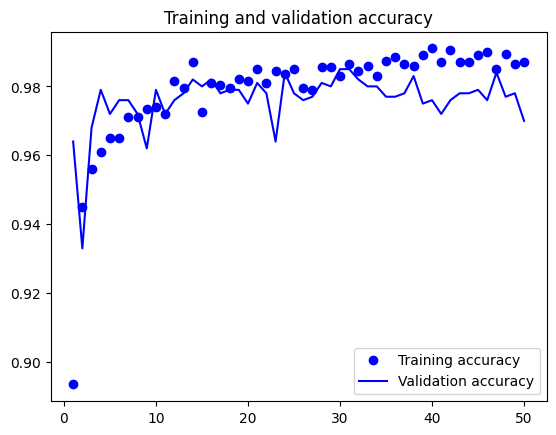

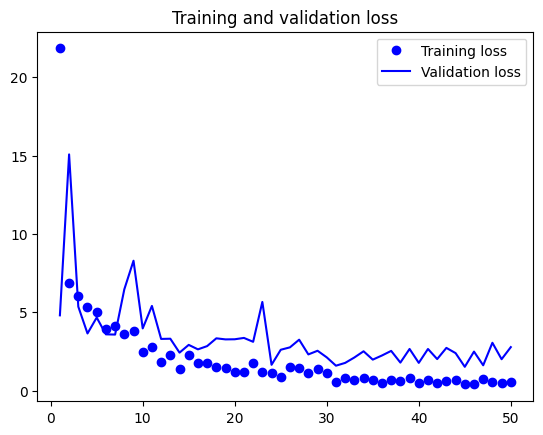

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 테스트 세트로 모델 평가
test_model = keras.models.load_model(
    'feature_extraction_with_data_augmentation')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 6s 92ms/step - loss: 2.3237 - accuracy: 0.9720
Test accuracy: 0.972


In [ ]:
# 기반 네트워크의 일부 층 동결을 해제하고 추가 미세 조정
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [ ]:
conv_base_trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainabe = False

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='fine_tuning',
        save_best_only=True,
        monitor='val_loss'
    )
]
history = model.fit(
    train_dataset, epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 14s 198ms/step - loss: 0.7740 - accuracy: 0.9875 - val_loss: 1.8969 - val_accuracy: 0.9790
Epoch 2/30
63/63 [==============================] - 13s 200ms/step - loss: 0.4666 - accuracy: 0.9910 - val_loss: 1.8575 - val_accuracy: 0.9780
Epoch 3/30
63/63 [==============================] - 14s 217ms/step - loss: 0.2563 - accuracy: 0.9940 - val_loss: 1.8477 - val_accuracy: 0.9780
Epoch 4/30
63/63 [==============================] - 13s 209ms/step - loss: 0.3941 - accuracy: 0.9920 - val_loss: 1.8135 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 14s 217ms/step - loss: 0.4061 - accuracy: 0.9885 - val_loss: 1.8067 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 9s 147ms/step - loss: 0.1089 - accuracy: 0.9950 - val_loss: 1.8111 - val_accuracy: 0.9800
Epoch 7/30
63/63 [==============================] - 9s 144ms/step - loss: 0.3776 - accuracy: 0.9915 - val_loss: 1.8103 - val_accuracy: 0.9790
E

In [ ]:
# 테스트 세트로 미세조정모델 평가
test_model = keras.models.load_model(
    'fine_tuning')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc:.3f}')

63/63 [==============================] - 6s 91ms/step - loss: 2.6079 - accuracy: 0.9770
Test accuracy: 0.977
